## James Bay  ANHAlysis 
### Preliminary search for Marine Heatwaves and Marine Cold Spells on ANHA4 model data.
### Study of 1958-1982

###### By Emilio Enriquez -- Apr19

----

This is a short follow up from the report on April 1st. 

This report focuses on the time range from 1958 to 1982, and both Marine Heatwaves (MHW), and Marine Cold Spells (MCS) are described. 

As mentioned in the previous report, the MHW categories presented in Hobday et. al. (2008) are used for this analysis. Also, based on suggestions in Schlegel et. al. (2021) a similar approach has been taken to describe MCS categories. In particular, $\Delta T$  is described as the difference between the mean sea surface temperature, SST$_{c}$, and the 10th percentile SST values. Multiples of $\Delta T$ are used to delineate each category. 

The full data range available (1958-2009) was used to calculate the category levels, this to keep consistency with the previous report.


In [1]:
# -*- coding: utf-8 -*-


# Data related libraries
import pandas as pd
import datetime
import numpy as np
import netCDF4 as nc

# Plotting related libraries
import matplotlib
# for interactive ploting
%matplotlib nbagg    
import matplotlib.pyplot as plt
from cartopy import crs as ccrs, feature as cfeature
import seaborn as sns

# Project custom made libaries
import anha4_utils as au
import anha4_plot_utils as apu

# Machine specific libraries
from sys import platform
import glob
import os


In [2]:
# Get location info for James Bay
location_info = au.init_location(hudson_bay=False)


In [3]:
# Load timeseries data
james_bay_timeseries_raw = pd.read_csv('../output_data/james_bay_timeseries_data.csv')

# Drop index column
james_bay_timeseries_raw.drop('Unnamed: 0',axis=1,inplace=True)



Following the previous report, instead of using the actual temperature values, this report shows the residual temperatures after subtracting SST$_{c}$, the resulting values are shown in the plot below. 

<IPython.core.display.Javascript object>


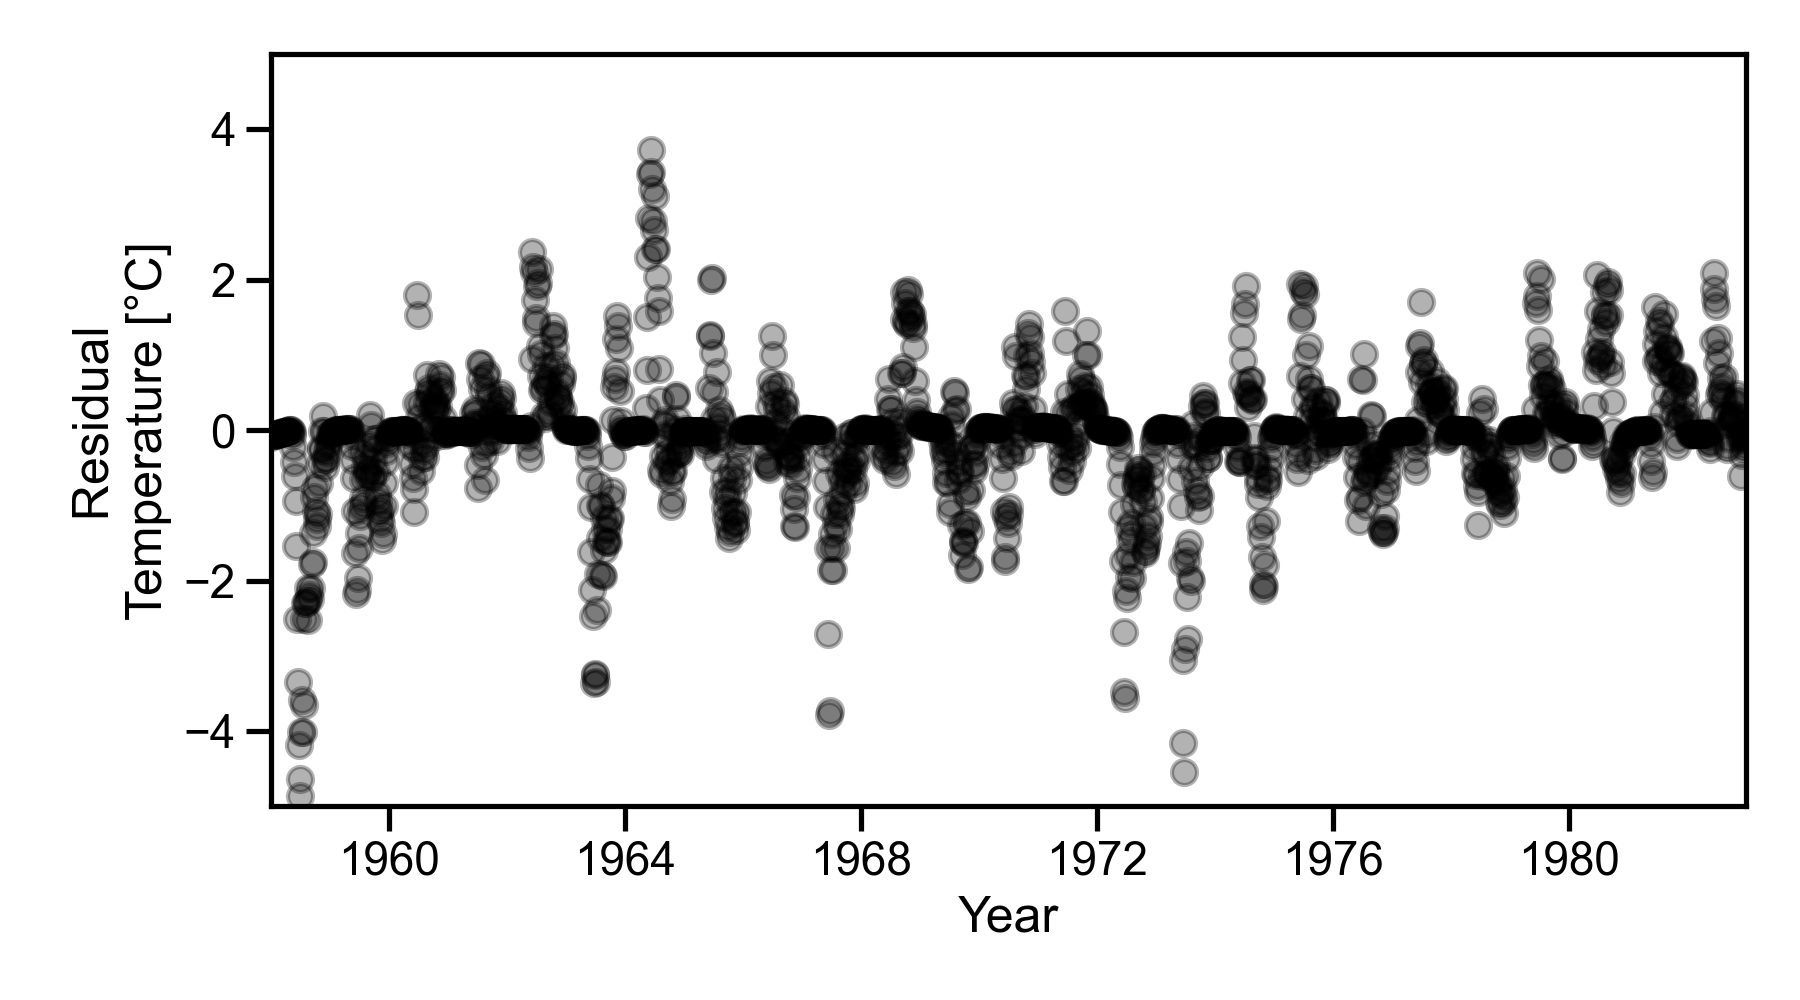

In [10]:
# Make copy
james_bay_timeseries = james_bay_timeseries_raw.copy()

# Anhalyze data. 
james_bay_timeseries = au.anhalize_timeseries(james_bay_timeseries)


year_min = 1958
year_max = 1982


# Selecting data given year range
james_bay_timeseries_cut = james_bay_timeseries[(james_bay_timeseries['year'] > (year_min-1)) & (james_bay_timeseries['year'] < (year_max +1))].copy()

# Setting up plot
plt.figure(figsize=(9, 5))

# Plotting all data
#plt.scatter(james_bay_timeseries_cut['date'],james_bay_timeseries_cut.var_mean,c='k',alpha=.3)
plt.scatter(james_bay_timeseries['date'],james_bay_timeseries.var_mean-james_bay_timeseries.var_mean_mean,c='k',alpha=.3)


# Set time limits
day_min = datetime.date(year_min,1,1)
day_max = datetime.date(year_max,12,31)

plt.ylim([-5,5])
plt.xlim([day_min,day_max])

# Plot frozen zone
plt.fill_between([day_min,day_max],[-2,-2],y2=[-2,-2],alpha=.2)


#plt.ylabel(' SST [\N{DEGREE SIGN}C] ')
plt.ylabel(' Residual\n Temperature [\N{DEGREE SIGN}C] ')
plt.xlabel('Year')

sns.set_context("talk")

plt.tight_layout()
plt.show()


The years with the largest positive deviations are 1964, 1962, 1980 and 1968. All these show Category I MHWs. The first three years are characterized by one or two short lasting MHWs (weeks). The last one shows a single long lasting MHW of about 50 days during the Fall. These four years are shown below.  

In [21]:
#looking at MHWs

# Make copy
james_bay_timeseries = james_bay_timeseries_raw.copy()

# Anhalyze data. 
james_bay_timeseries = au.anhalize_timeseries(james_bay_timeseries)


<IPython.core.display.Javascript object>


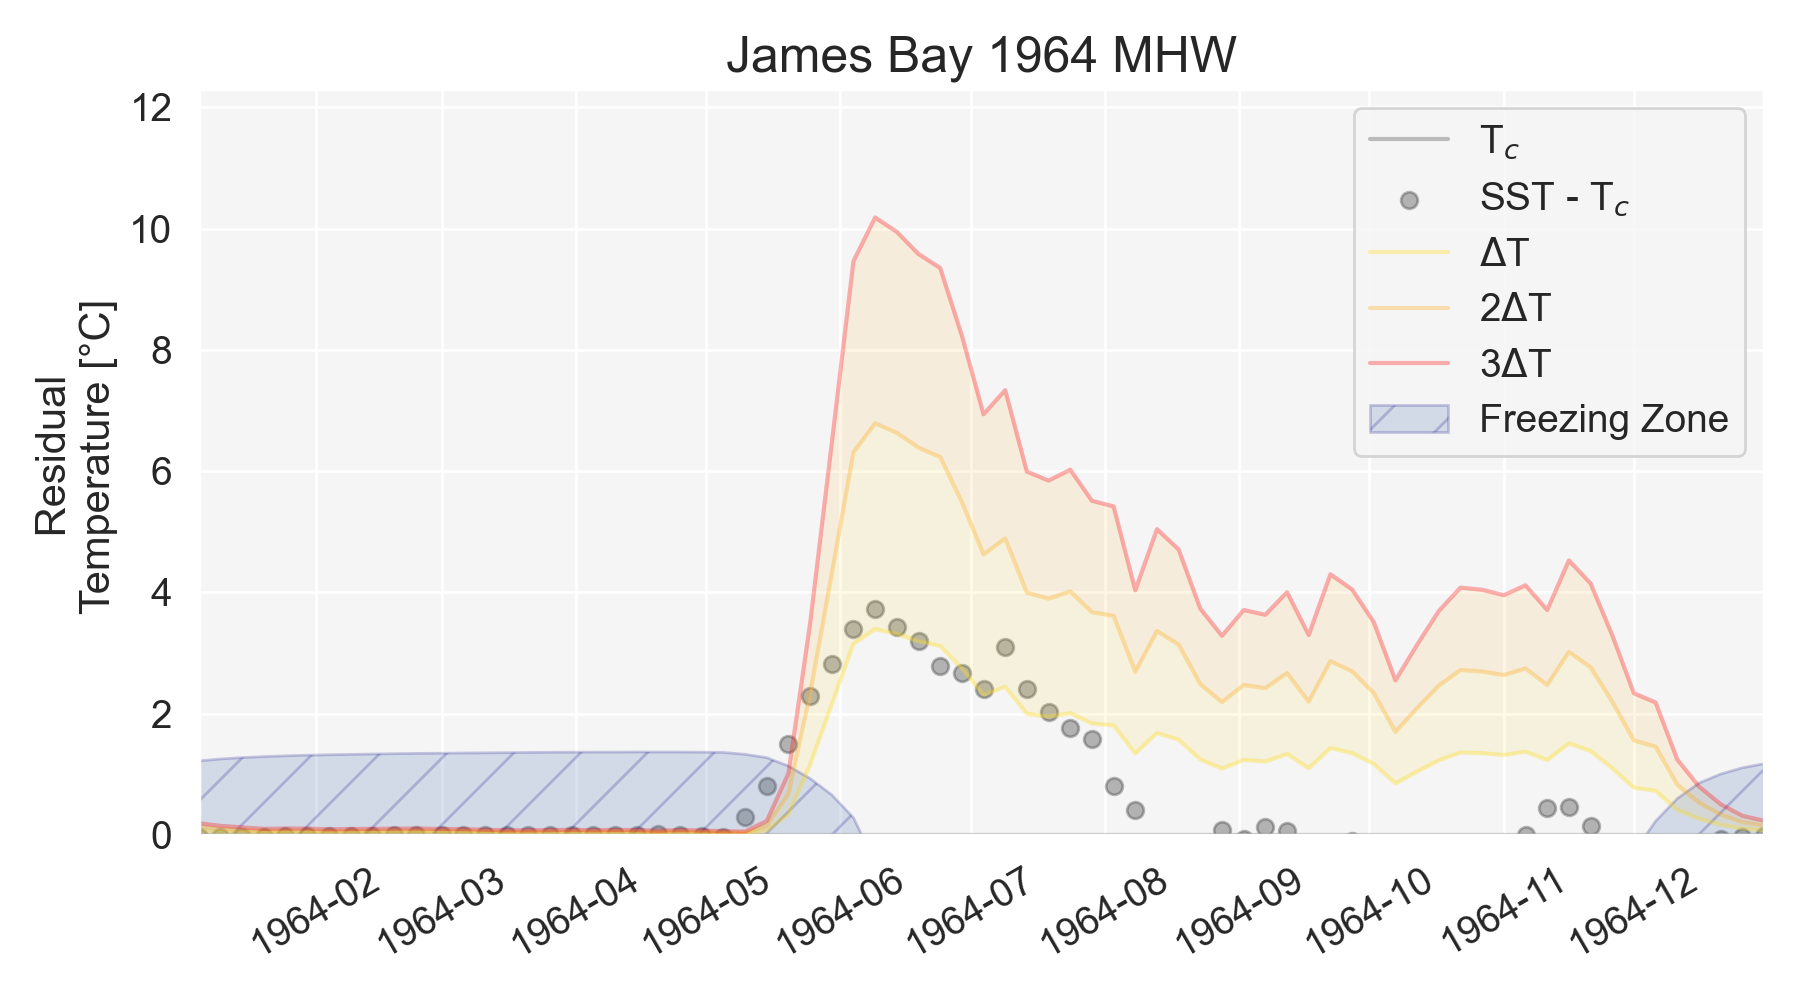

In [5]:

apu.plot_mhw(james_bay_timeseries,year=1964)

<IPython.core.display.Javascript object>


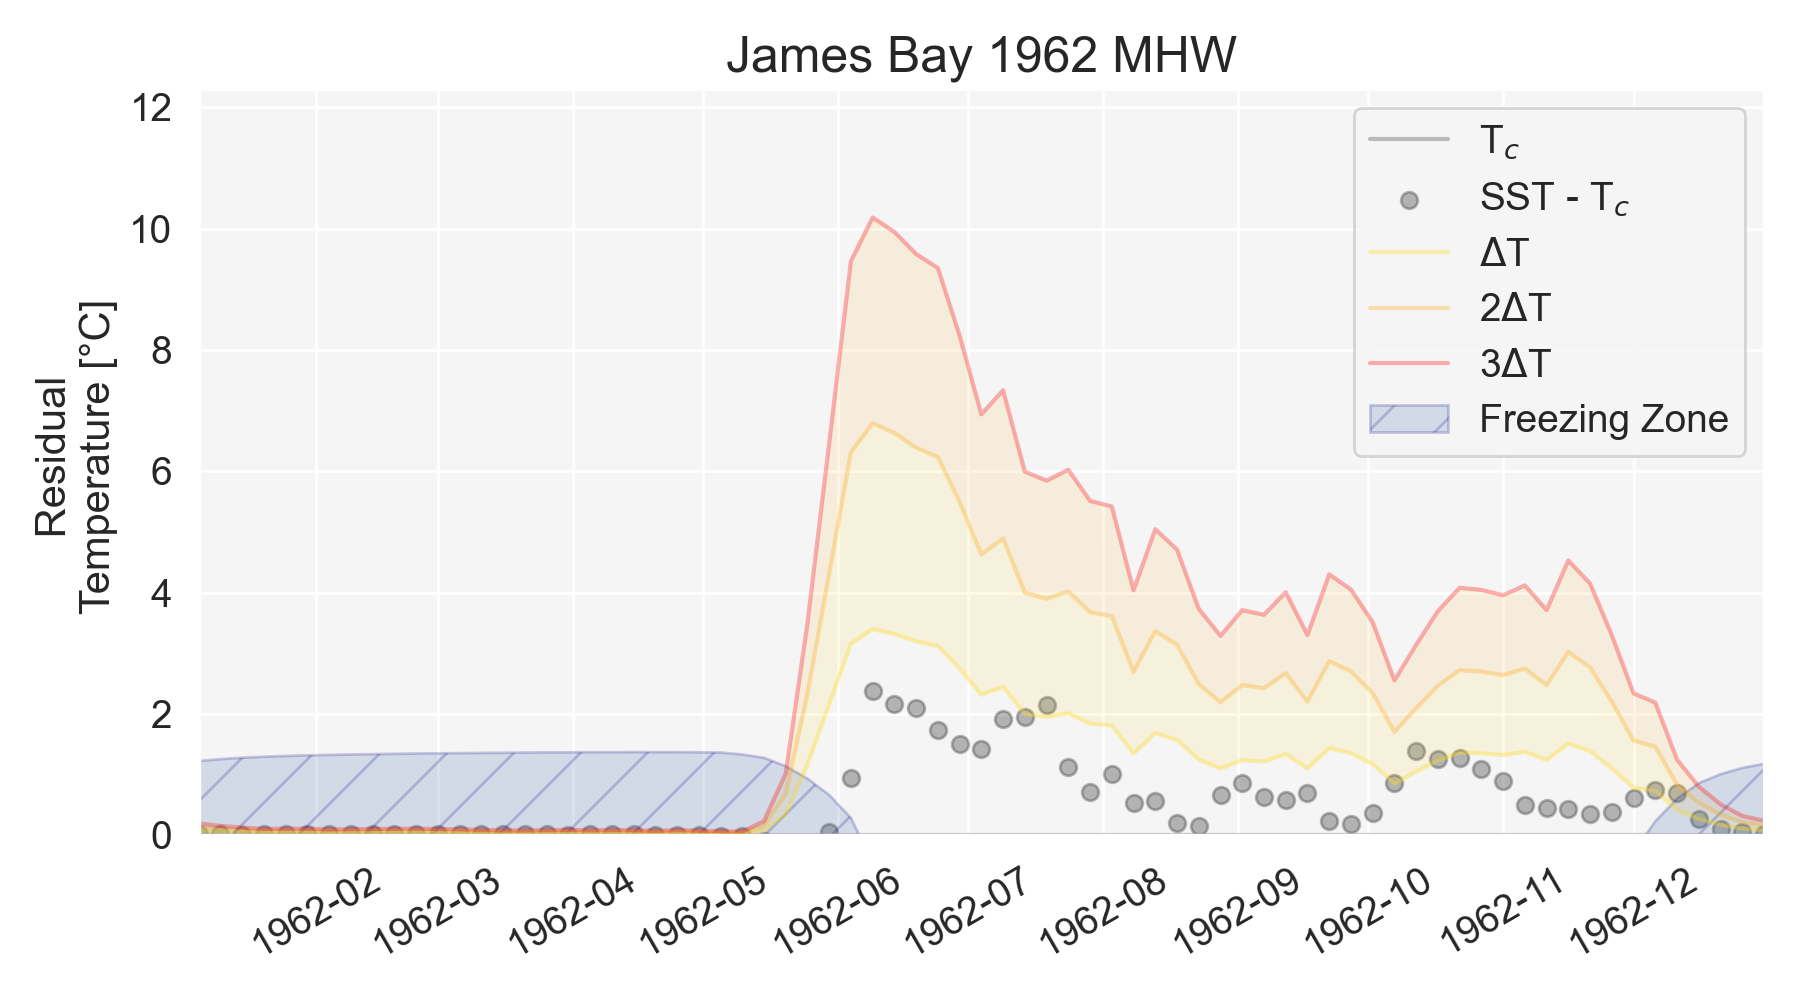

In [6]:
apu.plot_mhw(james_bay_timeseries,year=1962)

<IPython.core.display.Javascript object>


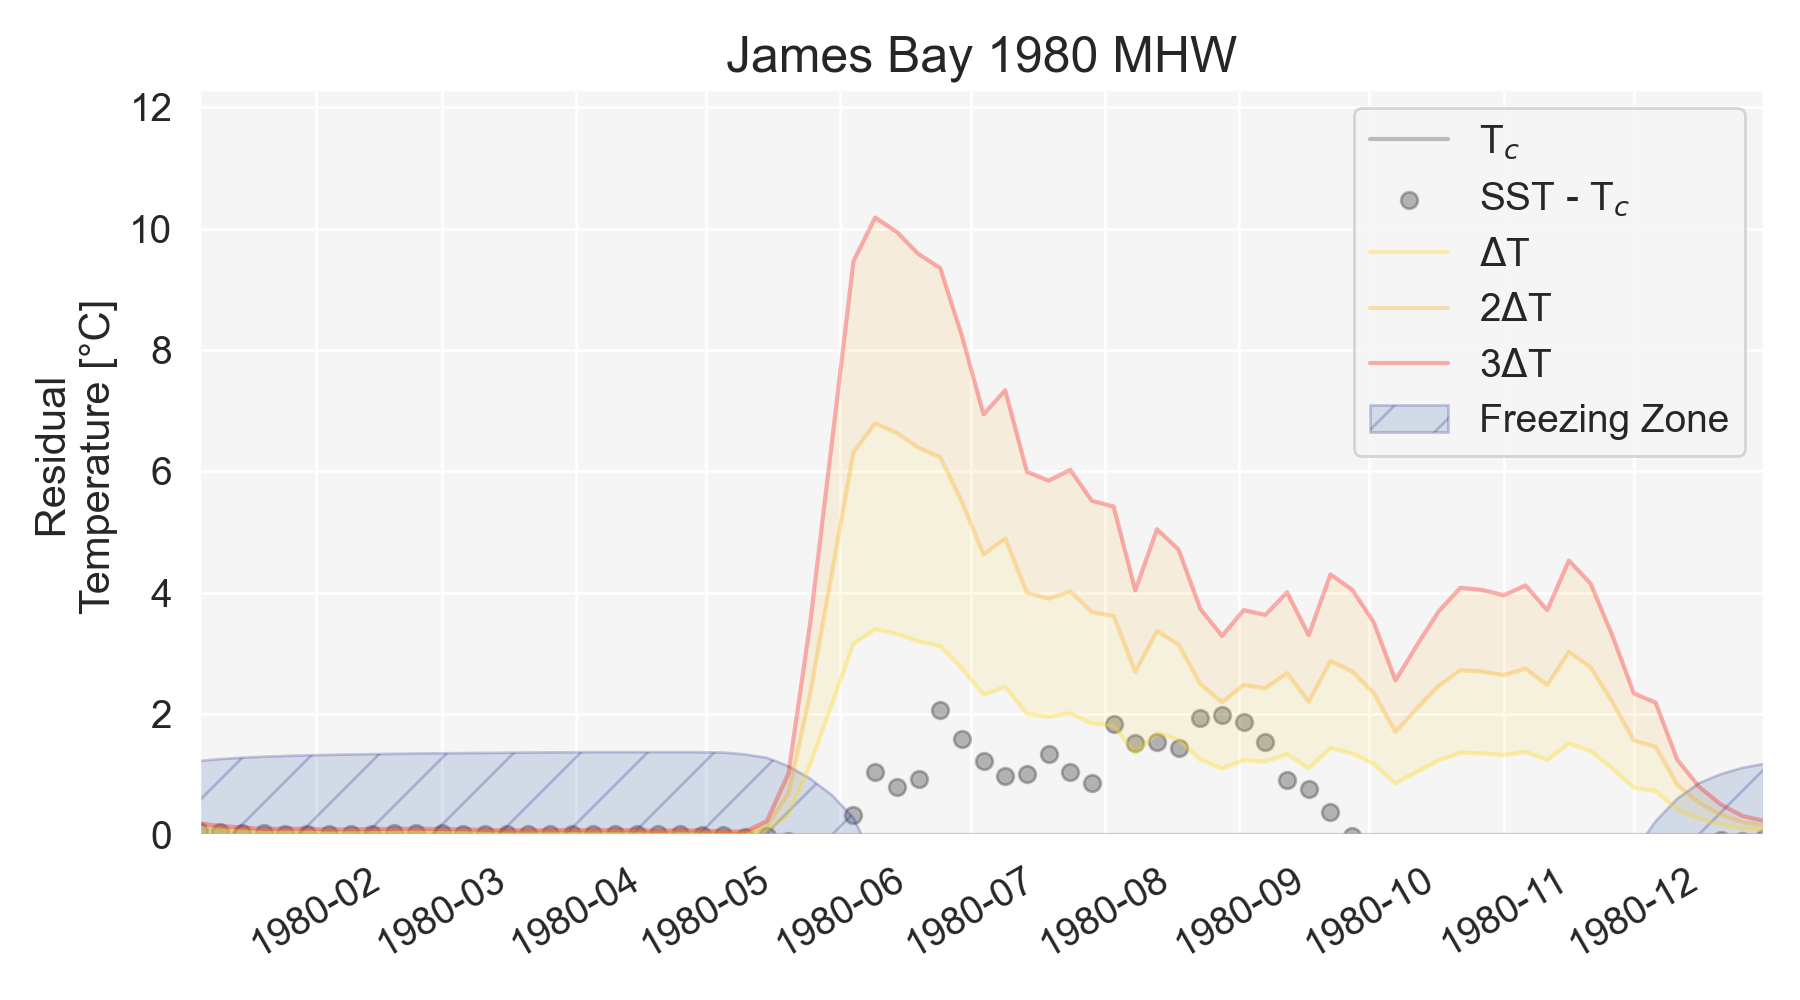

In [7]:
apu.plot_mhw(james_bay_timeseries,year=1980)

<IPython.core.display.Javascript object>


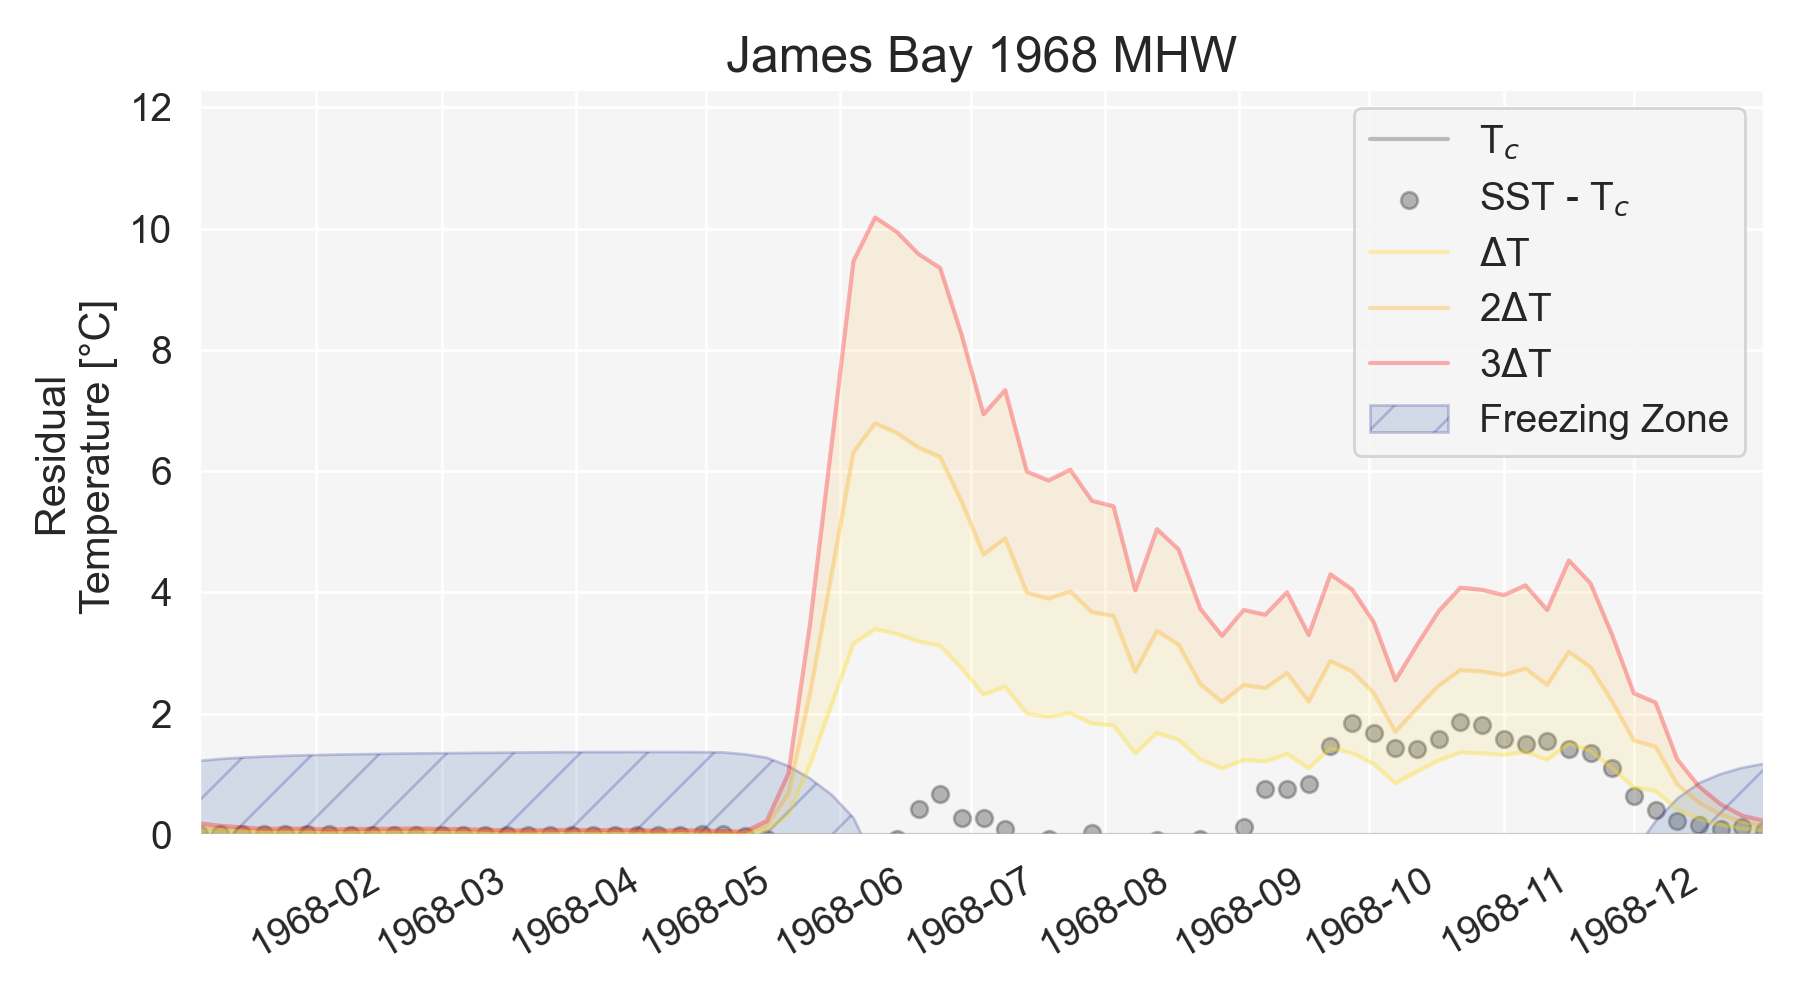

In [22]:
apu.plot_mhw(james_bay_timeseries,year=1968)


The years with the largest negative deviations from the mean are 1958, 1963, 1973, 1972, and 1959.
The first year shows a long lasting Category I MCS event that lasted about three months, this event reached Category II for a short period of time (less than 10 days). All the other years mentioned here present short lasting Category I events, the latest has a marginal result which resulted in freezing of the bay about 12 days before the average time. These years are shown below.  


In [24]:
# Make copy
james_bay_timeseries = james_bay_timeseries_raw.copy()

# Anhalyze data. 
james_bay_timeseries = au.anhalize_timeseries(james_bay_timeseries, mhw=False)


<IPython.core.display.Javascript object>


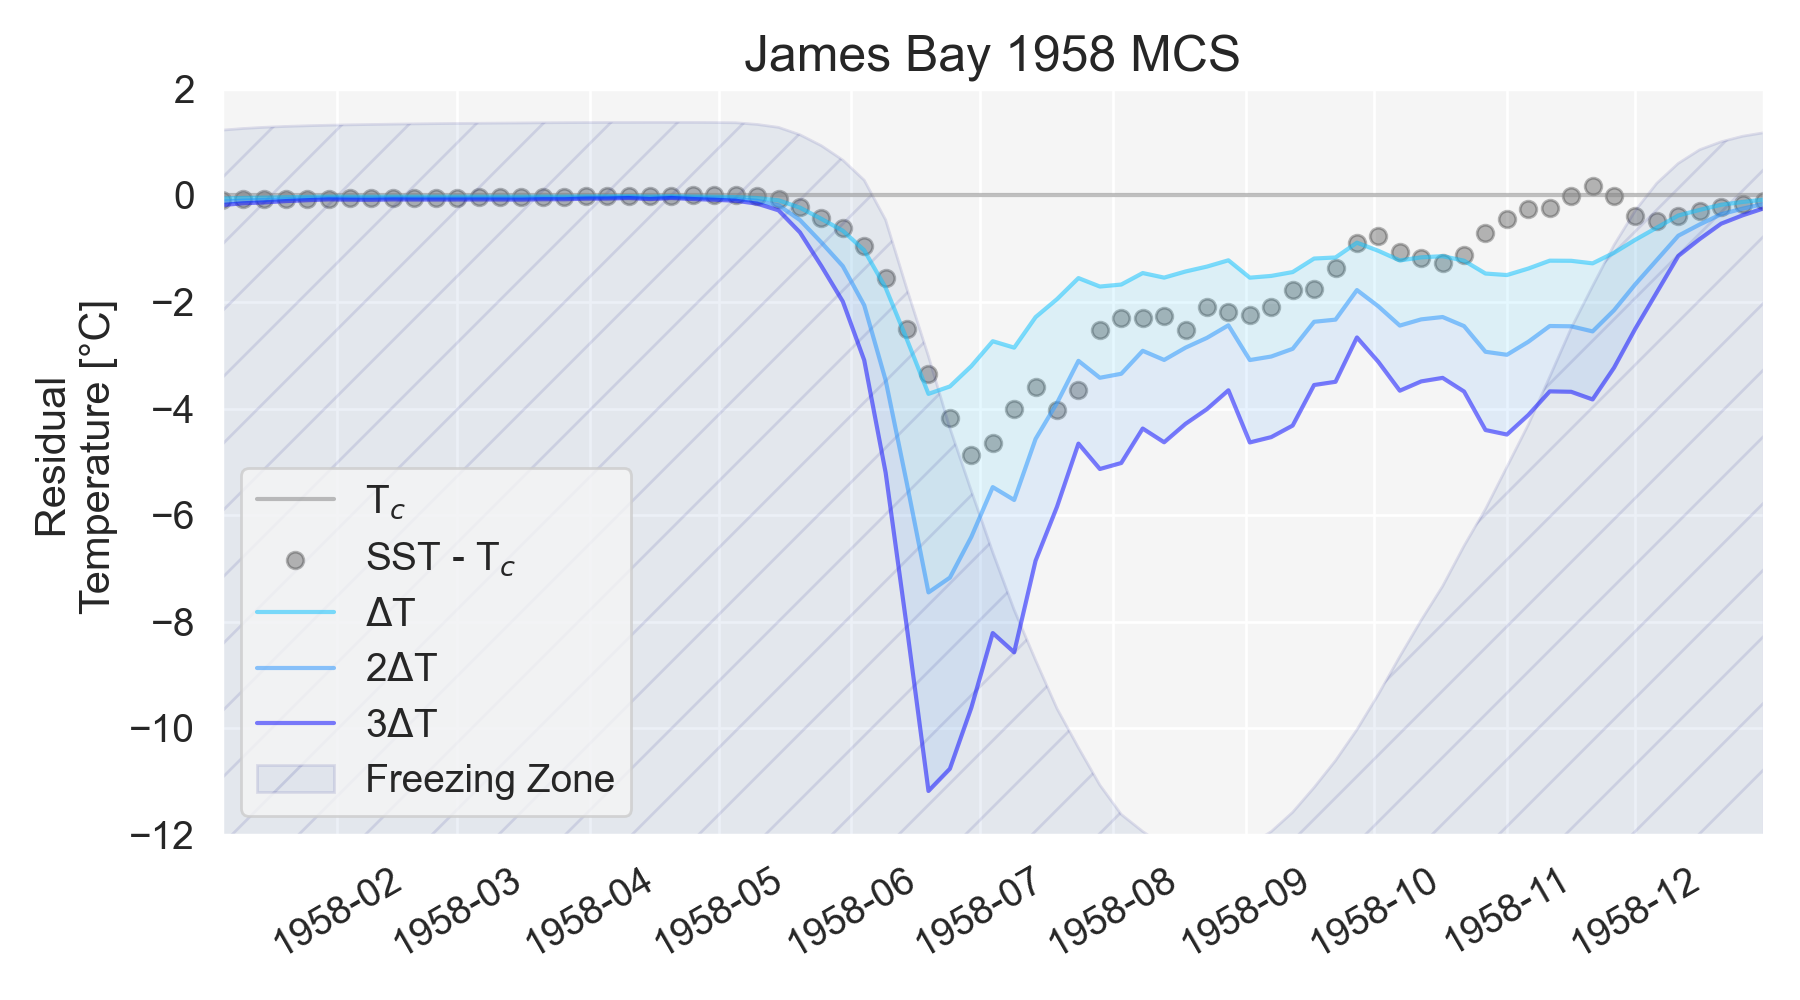

In [26]:

apu.plot_mhw(james_bay_timeseries,year=1958,mhw=False)


<IPython.core.display.Javascript object>


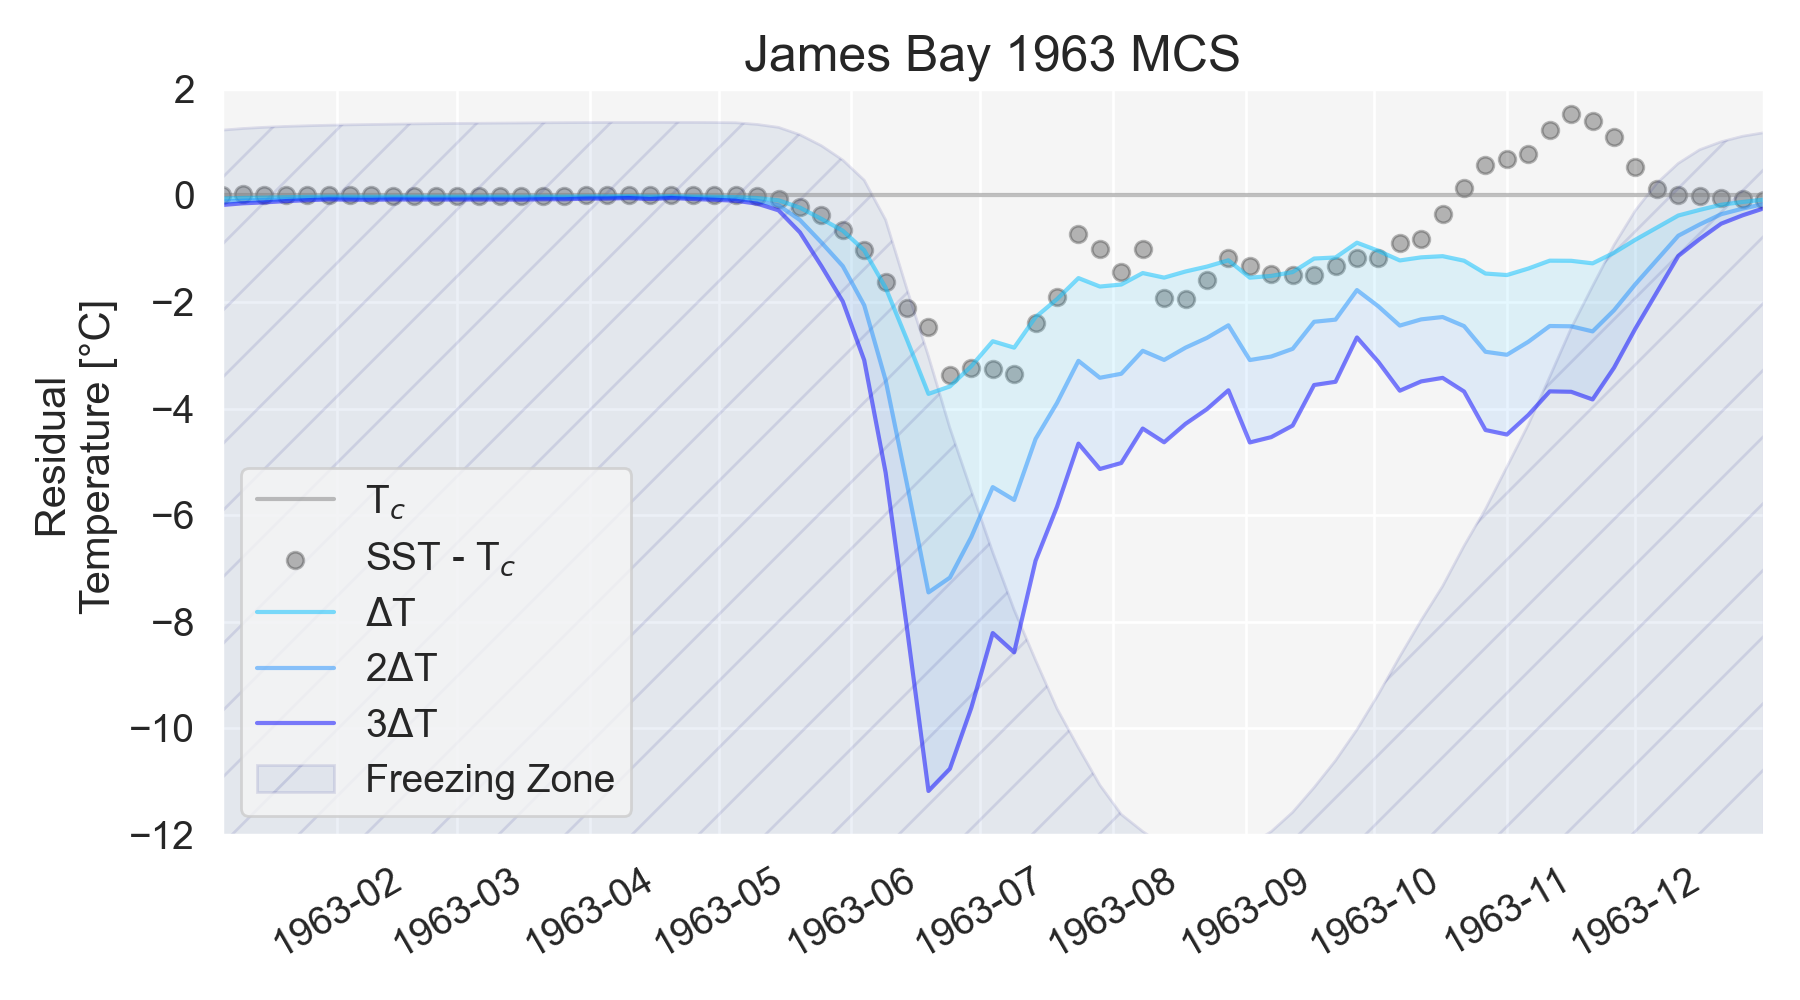

In [15]:

apu.plot_mhw(james_bay_timeseries,year=1963,mhw=False)


<IPython.core.display.Javascript object>


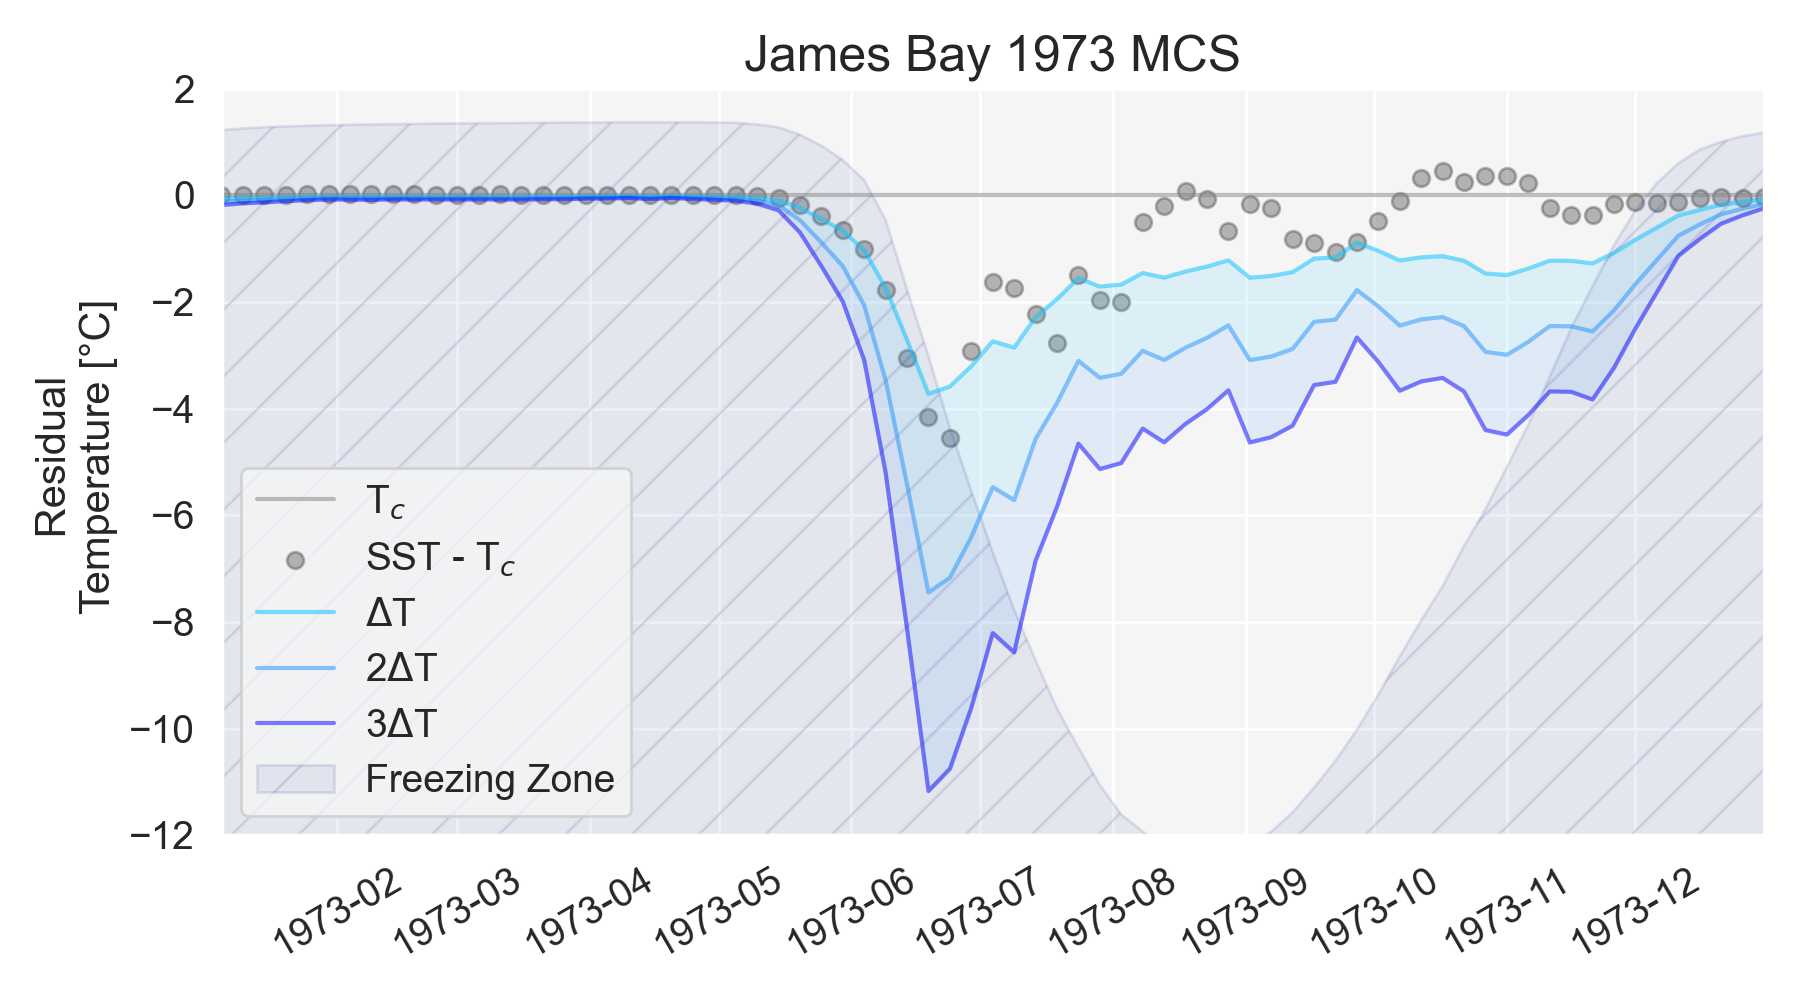

In [16]:

apu.plot_mhw(james_bay_timeseries,year=1973,mhw=False)


<IPython.core.display.Javascript object>


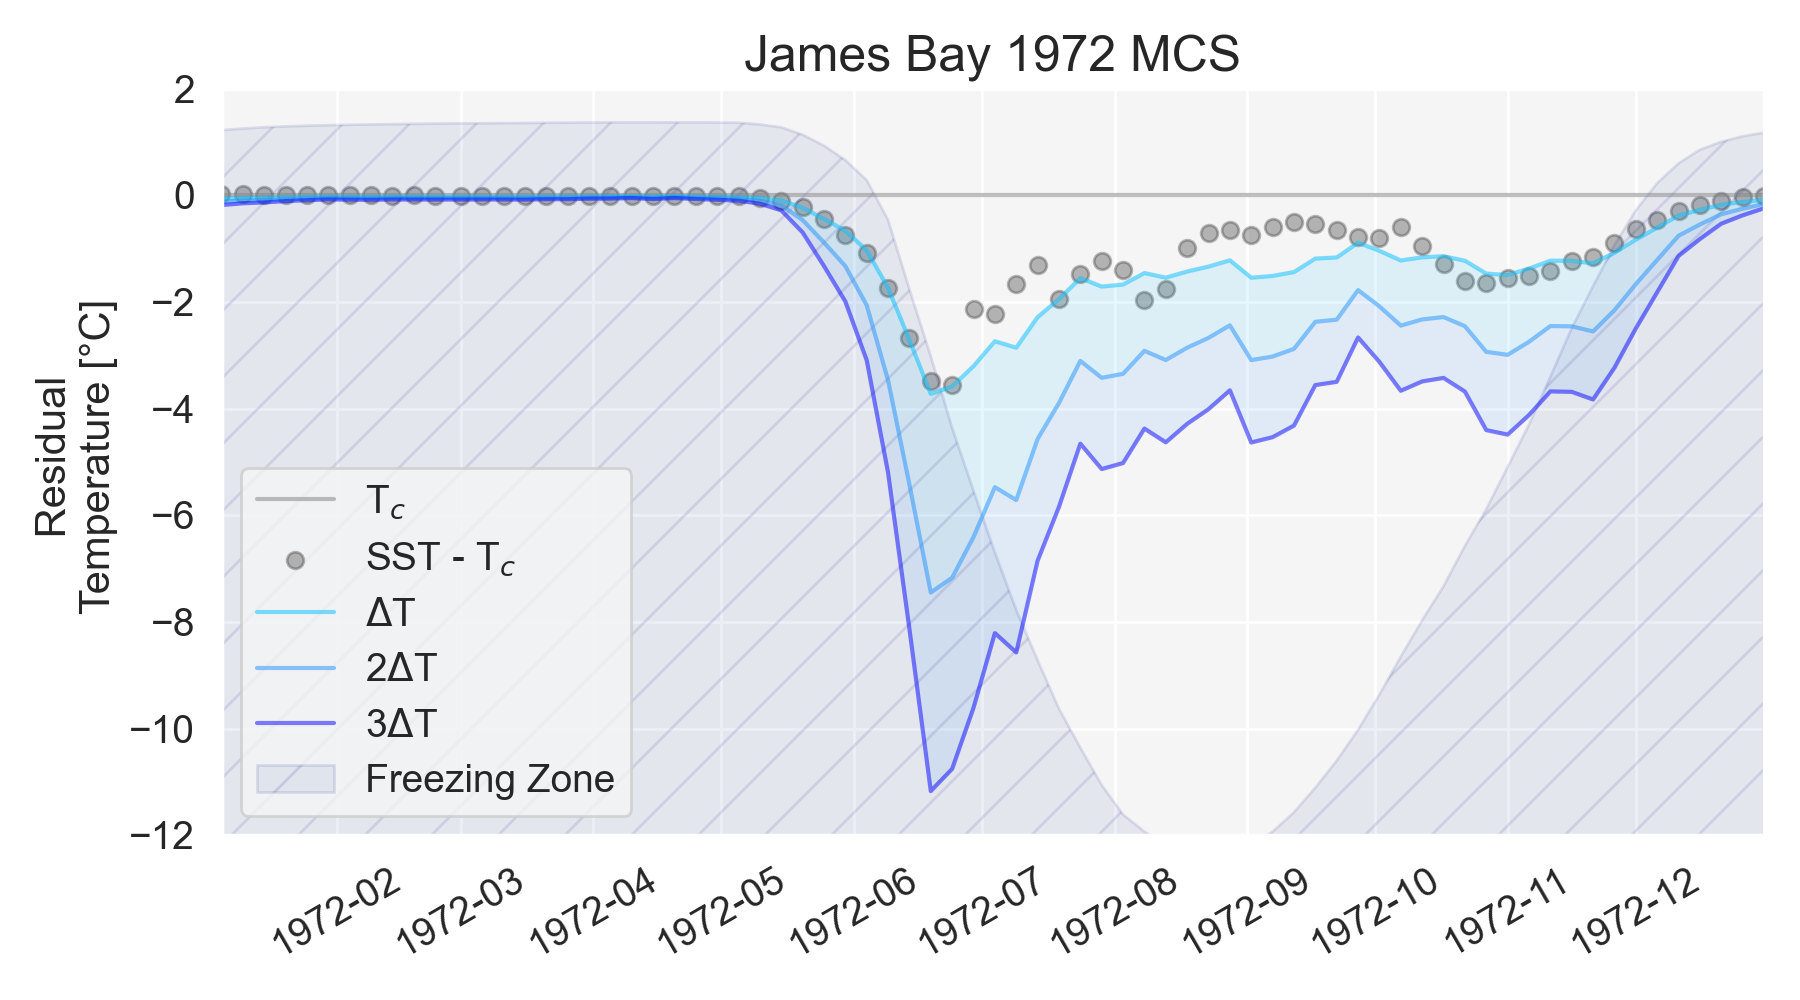

In [17]:

apu.plot_mhw(james_bay_timeseries,year=1972,mhw=False)


<IPython.core.display.Javascript object>


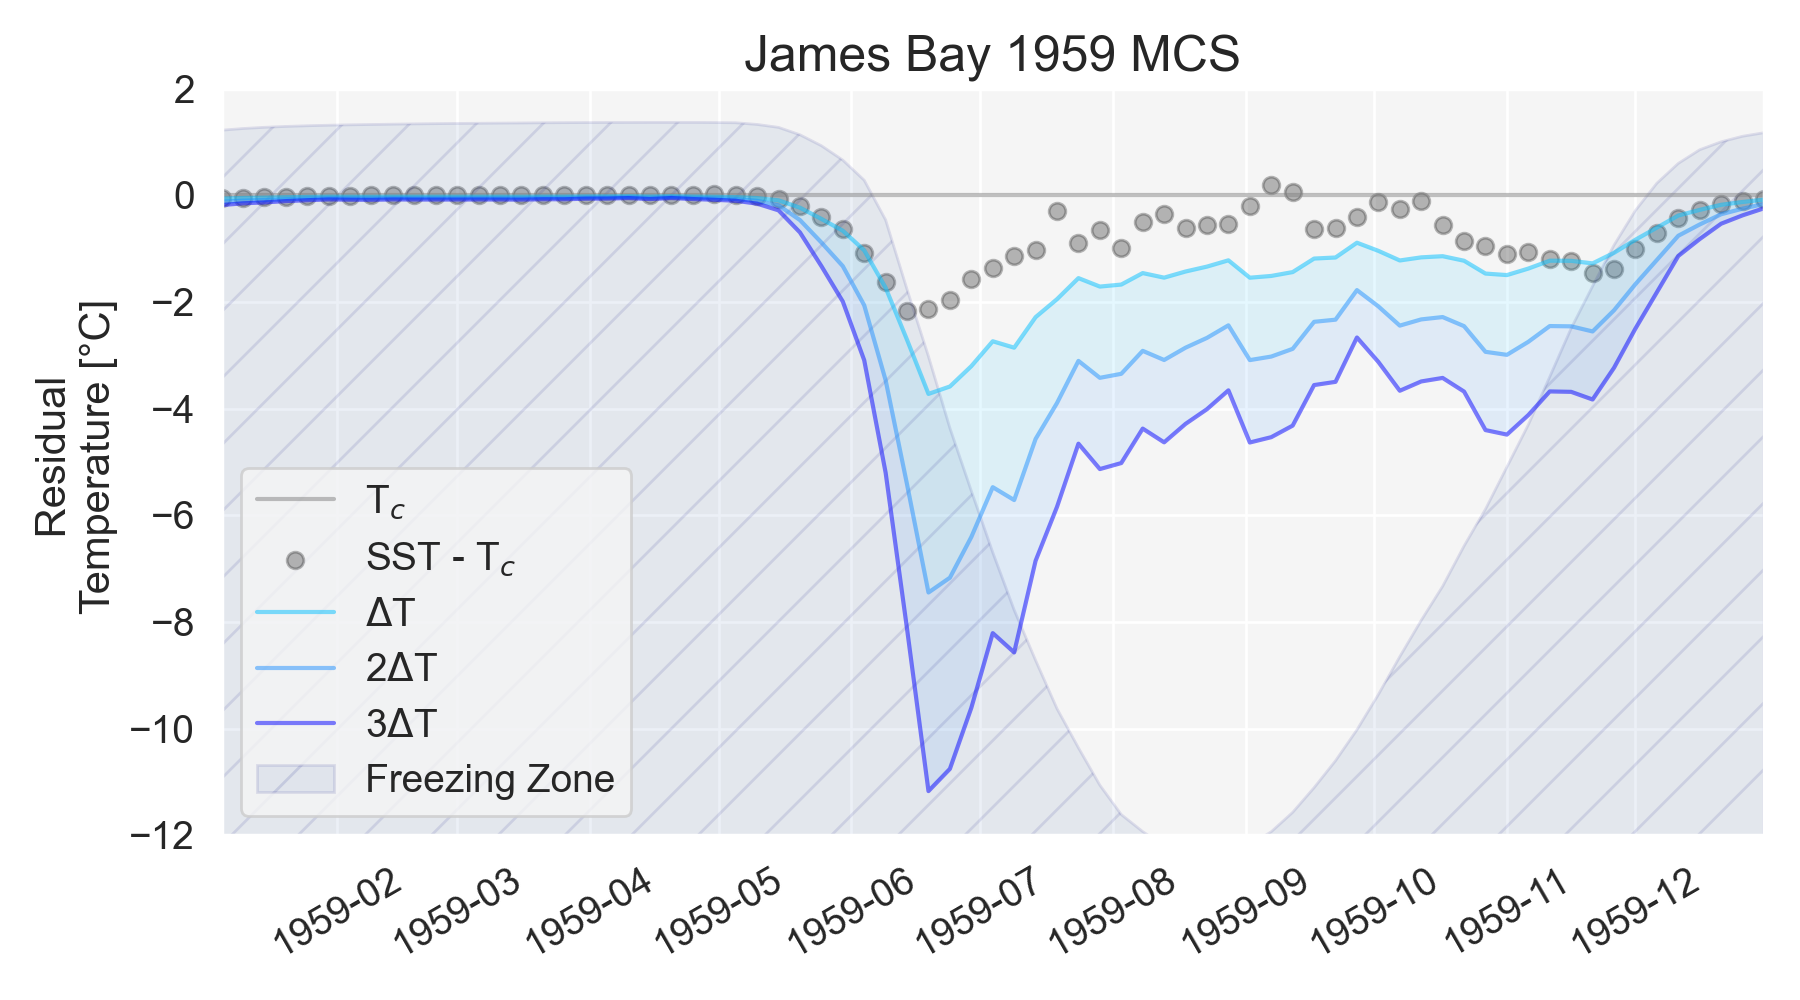

In [25]:

apu.plot_mhw(james_bay_timeseries,year=1959,mhw=False)


-----

#### References 


A. J. Hobday, et. al., "Categorizing and naming marine heatwaves", Oceanography (2018)

R. W. Schlegel, et. al. , "Marine cold-pells", Prog. Oceanogr. (2021)

